# Information about the dataset

## The raw dataset and the questionnaire

In this section, we made all the data analysis from the raw dataset available in the [ESMAP Sector of the World Bank](https://mtfenergyaccess.esmap.org/country/rwanda). This dataset was filled in thanks to a questionnaire (also available in the website), used to get precise informations to each households in Rwanda.


### Structure of the Database

The dataset uses the same framework as the questionnaire that consists of the following Sections:

- **Section A**: Household hoster, informations about the people of the household and their situation.

- **Section B**: Household Characteristics (general informations about the habitat, water, bank, etc.)

- **Section C**: Supply of Electricity

- **Section D**: Willingness to pay for a Grid Connection

- **Section E**: Willingness to pay for Solar Device 

- **Section F**: Kerosene/Fuel-based/Candle Lighting

- **Section G**: Dry-Celle Batteries

- **Section H**: Household Fuel Consumption

- **Section I**: Use of Cookng Solutions

- **Section J**: Space and wtaer heating 

- **Section K**: Willigness to pay for an Improved cookstove 

- **Section L**: Transportation and agricultural equipment ownership.

- **Section M**: Household Land Ownership

- **Section N**: Household Economic Shocks

- **Section O**: Street Lighting 

- **Section P**: Time Use

- **Section Q**: Health impacts

- **Section R**: Attitudes, Satisfactions

- **Section S**: Women's Empowerment

- **Section T**: Household based business/entreprise



##### Data and librairies 

In [21]:
import pandas as pd
import numpy as np
import os,sys
SRC_PATH = '../src/'
sys.path.insert(0, os.path.normpath(os.path.join(os.path.abspath(''), SRC_PATH)))

from plot_utils import *
from plot_utils import VARIATION, RED_COLORS
from IPython.display import Image

In [2]:
main = pd.read_excel('../Rwanda/raw_data/main.xlsx')
section_I = pd.read_csv('../Rwanda/raw_data/csv/I.csv')

## Description of the sample

The sample for the survey was made in two stages:
- 1. The selection of 275 villages in the sampling frame.
- 2. The selection of 12 households in each sample village. 

The choice of the villages and households is based a very precise procedure that is described in the MTF report. 

Before starting the tier computation, we extract some general information about the sample (residential area, type of electricity/cooking solution used, etc.).

#### Comparison of available data with the official report

In this subsection, we compare the distribution of the sample with the report. 

The available data used in the MTF report are presented in the table bellow:

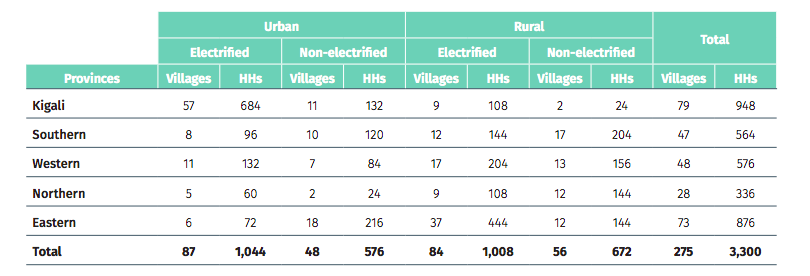

In [14]:
Image('../Rwanda/references/MTF_sample.png')

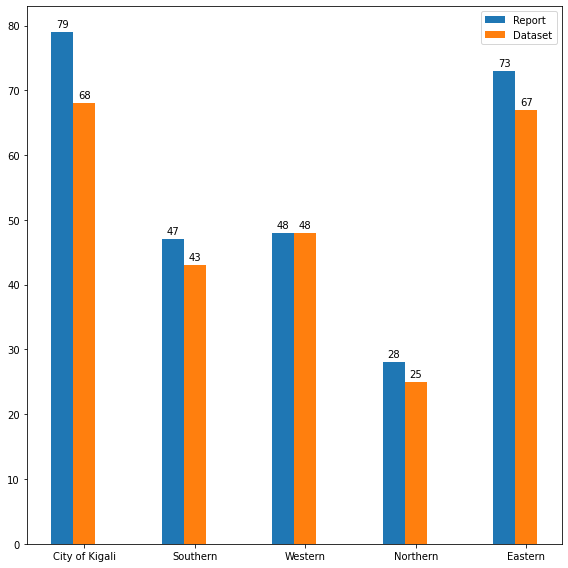

In [22]:
provinces = np.unique(main['Province'])
districts = np.unique(main['District'])
villages = np.unique(main['Village'])

report_df = pd.DataFrame.from_dict(
    {
        'Province':["City of Kigali","Southern","Western","Northern","Eastern"],
        'Villages':[79,47,48,28,73],
        'Households':[948,564,576,336,876], 
    })

n_villages = []
n_hh = []
for p in report_df['Province']:
    df_p = main.loc[main['Province']==p]
    villages = np.unique(df_p['Village'])
    n_villages.append(len(villages))
    n_hh.append(len(df_p))
    
real_df = pd.DataFrame.from_dict(
    {
        'Province':["City of Kigali","Southern","Western","Northern","Eastern"],
        'Villages': n_villages,
        'Households': n_hh, 
    })  
    
bars_data = [
    {
        'label': "Report",
        'data': report_df['Villages']
    },
    {
        'label': "Dataset",
        'data': real_df['Villages']
    }
]


plot_bars(x_labels=real_df['Province'],bars_data=bars_data,length=8,height=8,add_autolabel=True,percent=False)


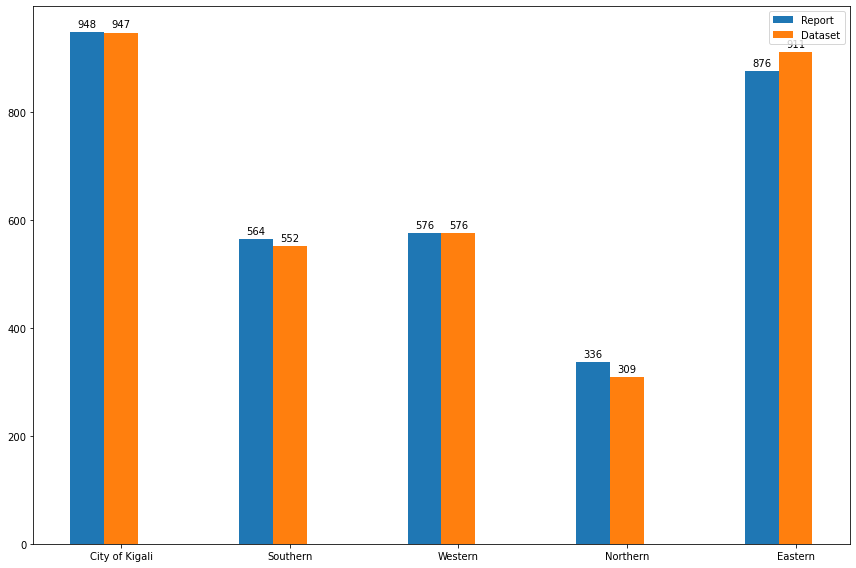

In [15]:
bars_data = [
    {
        'label': "Report",
        'data': report_df['Households']
    },
    {
        'label': "Dataset",
        'data': real_df['Households']
    }
]


plot_bars(x_labels=real_df['Province'],bars_data=bars_data,length=12,height=8,add_autolabel=True,percent=False)


##### Comments
This plots above show that the selection of villages and households used for the MTF survey is different from the one available for our survey, although the numbers are quite similar.
Thus, we will be able to make some comparisons with the MTF survey  order of magnitude but not with precise figures. 

## Type of habitat

There are two questions related to the habitat in the main dataset:
- **B5**: "What is the type of habitat?". Answers 1-3 are considered **rural**, answers 4-6 are considered **urban**. The answers of this question are presented in the screenshot bellow.
- Question **6** of the household identification section. However, the questionnaire has 2 options (urban, rural), while the dataset contains up to 6 possible answers



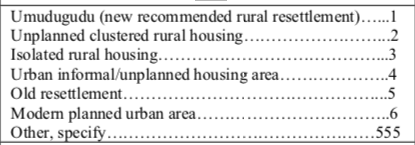

In [23]:
# Here is a screenshot of the questionnaire. 
Image("../Rwanda/references/rural_urban.png")

In order to always have the information about urban/rural, we add a new column to the main dataset:

In [24]:
# We add a new column to the main dataset, with values 'urban','rural', or 'other'
# First option habitat_question = "B5_What is the type of habitat"
habitat_question = "B5_What is the type of habitat"
habitat = []
for index,row in main.iterrows():
    if row[habitat_question]==4 or row[habitat_question]==5 or row[habitat_question]==6:
        habitat.append('urban')
    elif row[habitat_question]==1 or row[habitat_question]==2 or row[habitat_question]==3:
        habitat.append('rural')
    else:
        habitat.append('other')
        
##
main['habitat'] = habitat

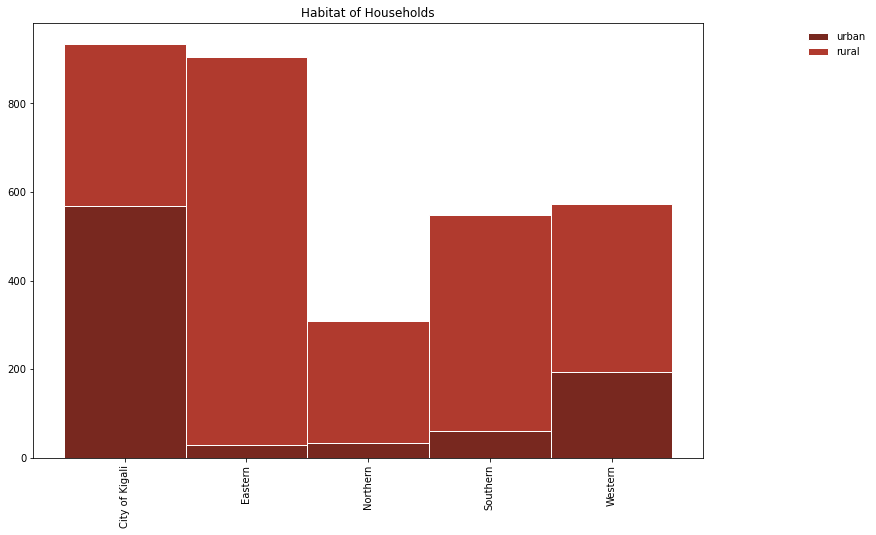

In [25]:
# We now check our overall habitat distribution

habitat = ["urban","rural"]
data = get_bar_chart_data(main,provinces,"Province",habitat,"habitat")
data["title"]="Habitat of Households"
stacked_bar_chart(data,color_scheme=VARIATION,barWidth=1,
                  figure_name=None,
                      with_legend=True,title=True,
                      horizontal=False,
                      filename_legend=None,
                      length=12,height=8) 